In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [177]:
from scipy.special import factorial

def make_data(locs, scales, size, bins):
    data = np.empty((np.size(locs), np.size(bins)-1))
    for i in range(np.size(locs)):
        data[i], _ = np.histogram(np.random.normal(locs[i], scales[i], size), bins=bins)
       
    # ensure multinomial coeffs for each year sum to 1
    norm = np.sum(data, axis=0)
    data /= norm
    
    return data

def likelihood(years, words, data):
    
    # get probability that all of words were picked given data at year, for each year
    
    # axes of data are (word, year). Extend words this way
    ext_words = (words * np.ones((words.size, years.size)).T).T
    
    # exponentiate then multiply along word axis for prob at each year
    multinom = np.prod(np.power(data, ext_words), axis=0)
    
    # get normalization factor
    norm = np.sum(multinom*dx)
    
    return multinom / norm
    
def prior(years):
    
    # an arbitrary exponential prior
    # to capture greater number of publications in recent years
    
    return np.exp(0.01*years) / (years.size*dx)

def posterior(years, words, data):
    
    post = likelihood(years, words, data) * prior(years)
    
    norm = np.sum(post*dx)
    
    return post / norm

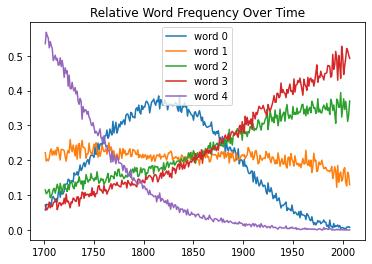

In [172]:
database_size = 5
locs = np.random.uniform(1700, 2000, size=database_size)
scales = np.random.uniform(50, 100, size=database_size)
size = 100000
bins = np.arange(1700.5, 2008.5, 1)
dx = bins[1] - bins[0]
years = (bins[:-1] + bins[1:]) /2

# histograms for all words in database
# axes: (word, year)
data = make_data(locs, scales, size, bins)

labels = [f"word {i}" for i in range(database_size)]

fig, ax = plt.subplots()

lines = ax.plot((years*np.ones((np.size(locs), np.size(bins)-1))).T, data.T)

ax.legend(lines, labels)
ax.set_title("Relative Word Frequency Over Time")
plt.show()

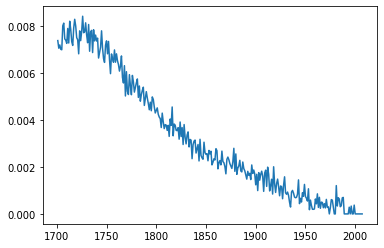

[0 1 0 0 1]


In [181]:
# num. of occurances of each word in the database for this random fake book
words = np.random.randint(0, 2, size=database_size)

plt.plot(years, posterior(years, words, data))
plt.show()
print(words)